# Importing Libraries

In [71]:
import sys
sys.path.append('../')

In [72]:
%load_ext autoreload
%autoreload 2
import IPython.display
import matplotlib.pyplot as plt
import cv2
import numpy as np
import pickle as pkl
from utils import utils_ade20k
import pandas as pd 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Using ADE20K Dataset Pickle File

In [73]:
# Load index with global information about ADE20K
DATASET_PATH = 'D:/Dataset/snehalb06_739a88df/'
index_file = 'ADE20K_2021_17_01/index_ade20k.pkl'
with open('{}/{}'.format(DATASET_PATH, index_file), 'rb') as f:
    index_ade20k = pkl.load(f)

In [74]:
for k,v in index_ade20k.items():
    print(k," : ",len(v))

filename  :  27574
folder  :  27574
objectIsPart  :  3688
objectPresence  :  3688
objectcounts  :  3688
objectnames  :  3688
proportionClassIsPart  :  3688
scene  :  27574
wordnet_found  :  3688
wordnet_level1  :  3688
wordnet_synset  :  3680
wordnet_hypernym  :  3680
wordnet_gloss  :  3680
wordnet_frequency  :  3680
description  :  15


## Description of the fields 

In [5]:
index_ade20k['description']

{'filename': 'array of length N=27574 with the image file names',
 'folder': 'array of length N with the image folder names.',
 'scene': 'array of length N providing the scene name (same classes as the Places database) for each image.',
 'objectIsPart': 'array of size [C, N] counting how many times an object is a part in each image. objectIsPart[c,i]=m if in image i object class c is a part of another object m times. For objects, objectIsPart[c,i]=0, and for parts we will find: objectIsPart[c,i] = objectPresence(c,i)',
 'objectPresence': 'array of size [C, N] with the object counts per image. objectPresence(c,i)=n if in image i there are n instances of object class c.',
 'objectcounts': 'array of length C with the number of instances for each object class.',
 'objectnames': 'array of length C with the object class names.',
 'proportionClassIsPart': 'array of length C with the proportion of times that class c behaves as a part. If proportionClassIsPart[c]=0 then it means that this is a 

## Demo with Image

In [6]:
print("File loaded, description of the attributes:")
print('--------------------------------------------')
for attribute_name, desc in index_ade20k['description'].items():
    print('* {}: {}'.format(attribute_name, desc))
print('--------------------------------------------\n')

i = 16899 # 16899, 16964
nfiles = len(index_ade20k['filename'])
file_name = index_ade20k['filename'][i]
num_obj = index_ade20k['objectPresence'][:, i].sum()
num_parts = index_ade20k['objectIsPart'][:, i].sum()
count_obj = index_ade20k['objectPresence'][:, i].max()
obj_id = np.where(index_ade20k['objectPresence'][:, i] == count_obj)[0][0]
obj_name = index_ade20k['objectnames'][obj_id]
full_file_name = '{}/{}'.format(index_ade20k['folder'][i], index_ade20k['filename'][i])

print("The dataset has {} images".format(nfiles))
print("The image at index {} is {}".format(i, file_name))
print("It is located at {}".format(full_file_name))
print("It happens in a {}".format(index_ade20k['scene'][i]))
print("It has {} objects, of which {} are parts".format(num_obj, num_parts))
print("The most common object is object {} ({}), which appears {} times".format(obj_name, obj_id, count_obj))

File loaded, description of the attributes:
--------------------------------------------
* filename: array of length N=27574 with the image file names
* folder: array of length N with the image folder names.
* scene: array of length N providing the scene name (same classes as the Places database) for each image.
* objectIsPart: array of size [C, N] counting how many times an object is a part in each image. objectIsPart[c,i]=m if in image i object class c is a part of another object m times. For objects, objectIsPart[c,i]=0, and for parts we will find: objectIsPart[c,i] = objectPresence(c,i)
* objectPresence: array of size [C, N] with the object counts per image. objectPresence(c,i)=n if in image i there are n instances of object class c.
* objectcounts: array of length C with the number of instances for each object class.
* objectnames: array of length C with the object class names.
* proportionClassIsPart: array of length C with the proportion of times that class c behaves as a part. 

## Generating Segmentation Masks

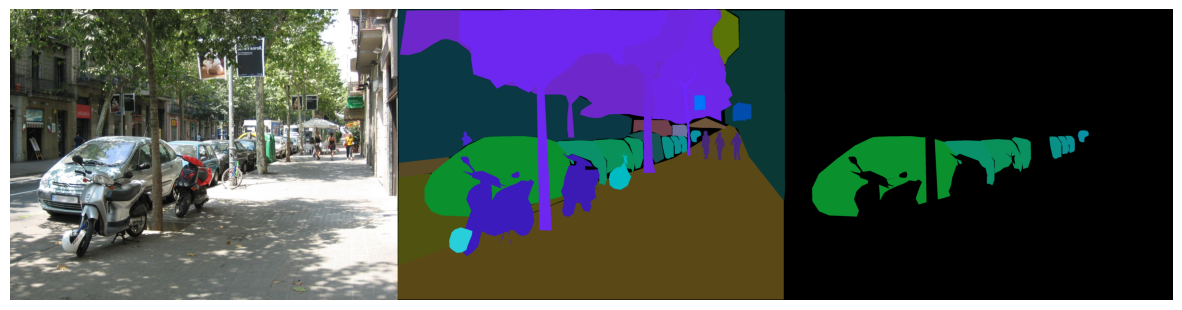

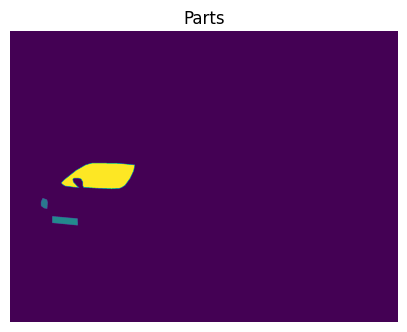

In [7]:
root_path = DATASET_PATH

# This function reads the image and mask files and generate instance and segmentation
# masks
info = utils_ade20k.loadAde20K('{}\{}'.format(root_path, full_file_name))
img = cv2.imread(info['img_name'])[:,:,::-1]
seg = cv2.imread(info['segm_name'])[:,:,::-1]
seg_mask = seg.copy()

# The 0 index in seg_mask corresponds to background (not annotated) pixels
seg_mask[info['class_mask'] != obj_id+1] *= 0
plt.figure(figsize=(15,5))

plt.imshow(np.concatenate([img, seg, seg_mask], 1))
plt.axis('off')
if len(info['partclass_mask']):
    plt.figure(figsize=(5*len(info['partclass_mask']), 5))
    plt.title('Parts')
    plt.imshow(np.concatenate(info['partclass_mask'],1))
    plt.axis('off')

(-0.5, 2199.5, 1649.5, -0.5)

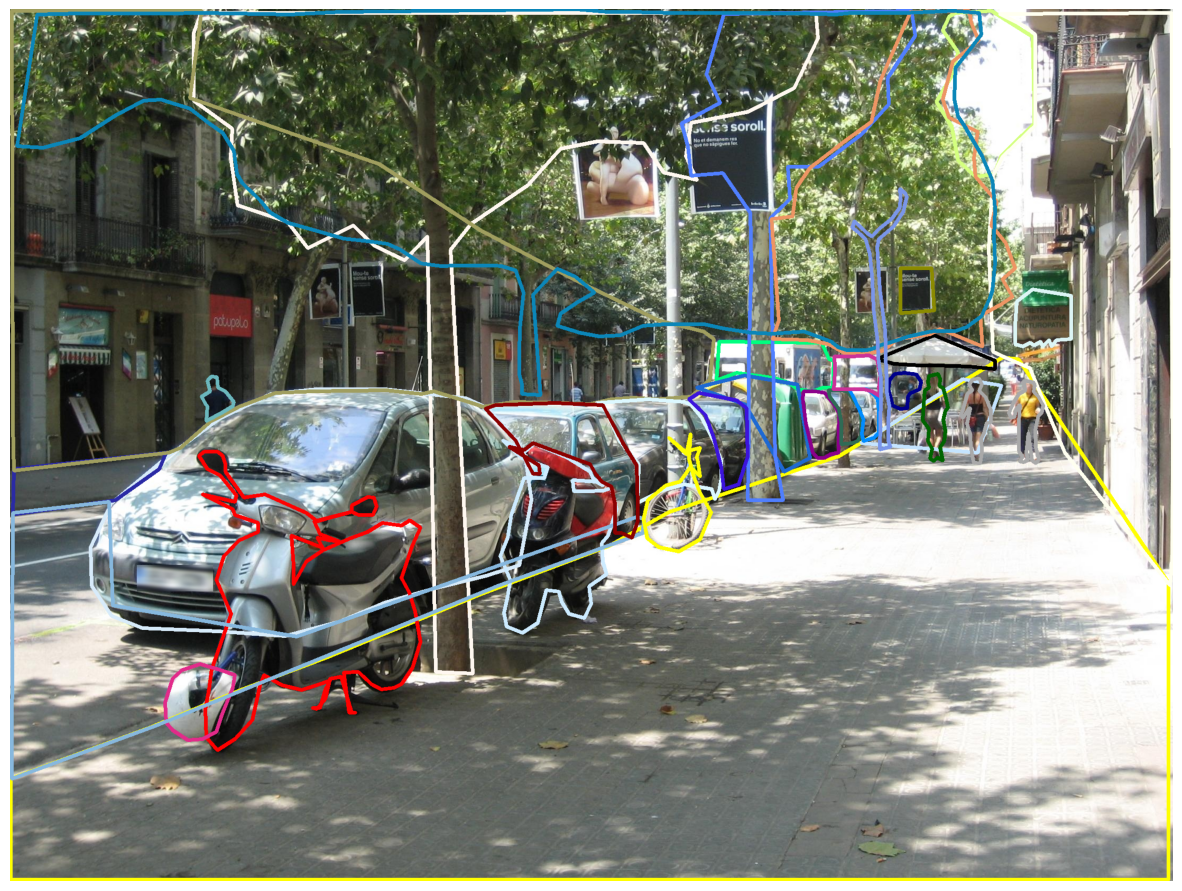

In [8]:
#Plotting Segmentation mask
img = utils_ade20k.plot_polygon('{}/{}'.format(root_path, full_file_name), info)
plt.figure(figsize=(15,15))
plt.imshow(img[:, :, ::-1])
plt.axis('off')

# Undersatnding Color Coding and number of traing and validation records specific to category 

In [ ]:
eda_df_data = pd.read_excel("D:\Dataset\snehalb06_739a88df\ADE20K_2021_17_01\color_coding_semantic_segmentation_classes.xlsx")
eda_df_data

In [12]:
eda_df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Idx                 150 non-null    int64  
 1   Ratio               150 non-null    float64
 2   Train               150 non-null    int64  
 3   Val                 150 non-null    int64  
 4   Stuff               150 non-null    int64  
 5   Color_Code (R,G,B)  150 non-null    object 
 6   Color_Code(hex)     150 non-null    object 
 7   Color               0 non-null      float64
 8   Name                150 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 10.7+ KB


## Training Data

In [ ]:
final_df = eda_df_data.sort_values(by=['Train'], ascending=False)
final_df

In [15]:
colors = final_df["Color_Code(hex)"]
colors

0      #787878
3      #503232
2      #06E6E6
4      #04C803
14     #08FF33
        ...   
105    #8500FF
128    #0ABED4
103    #FFEB00
111    #FF0070
96     #00FFA3
Name: Color_Code(hex), Length: 150, dtype: object

In [61]:
Label = list(final_df["Name"])
Name =[]

for i in Label:
    Name.append(i)

print(*Name,sep="\n")

wall
floor;flooring
sky
tree
door;double;door
ceiling
building;edifice
person;individual;someone;somebody;mortal;soul
windowpane;window
table
road;route
plant;flora;plant;life
painting;picture
chair
car;auto;automobile;machine;motorcar
lamp
sidewalk;pavement
cabinet
signboard;sign
light;light;source
grass
curtain;drape;drapery;mantle;pall
streetlight;street;lamp
bed
mirror
earth;ground
mountain;mount
shelf
cushion
box
fence;fencing
flower
seat
vase
pot;flowerpot
sofa;couch;lounge
sink
armchair
rug;carpet;carpeting
book
sconce
pole
bottle
pillow
stairs;steps
railing;rail
column;pillar
coffee;table;cocktail;table
rock;stone
clock
water
desk
ashcan;trash;can;garbage;can;wastebin;ash;bin;ash-bin;ashbin;dustbin;trash;barrel;trash;bin
house
bench
sea
basket;handbasket
television;television;receiver;television;set;tv;tv;set;idiot;box;boob;tube;telly;goggle;box
chandelier;pendant;pendent
plate
stairway;staircase
path
van
chest;of;drawers;chest;bureau;dresser
awning;sunshade;sunblind
stove;kitc

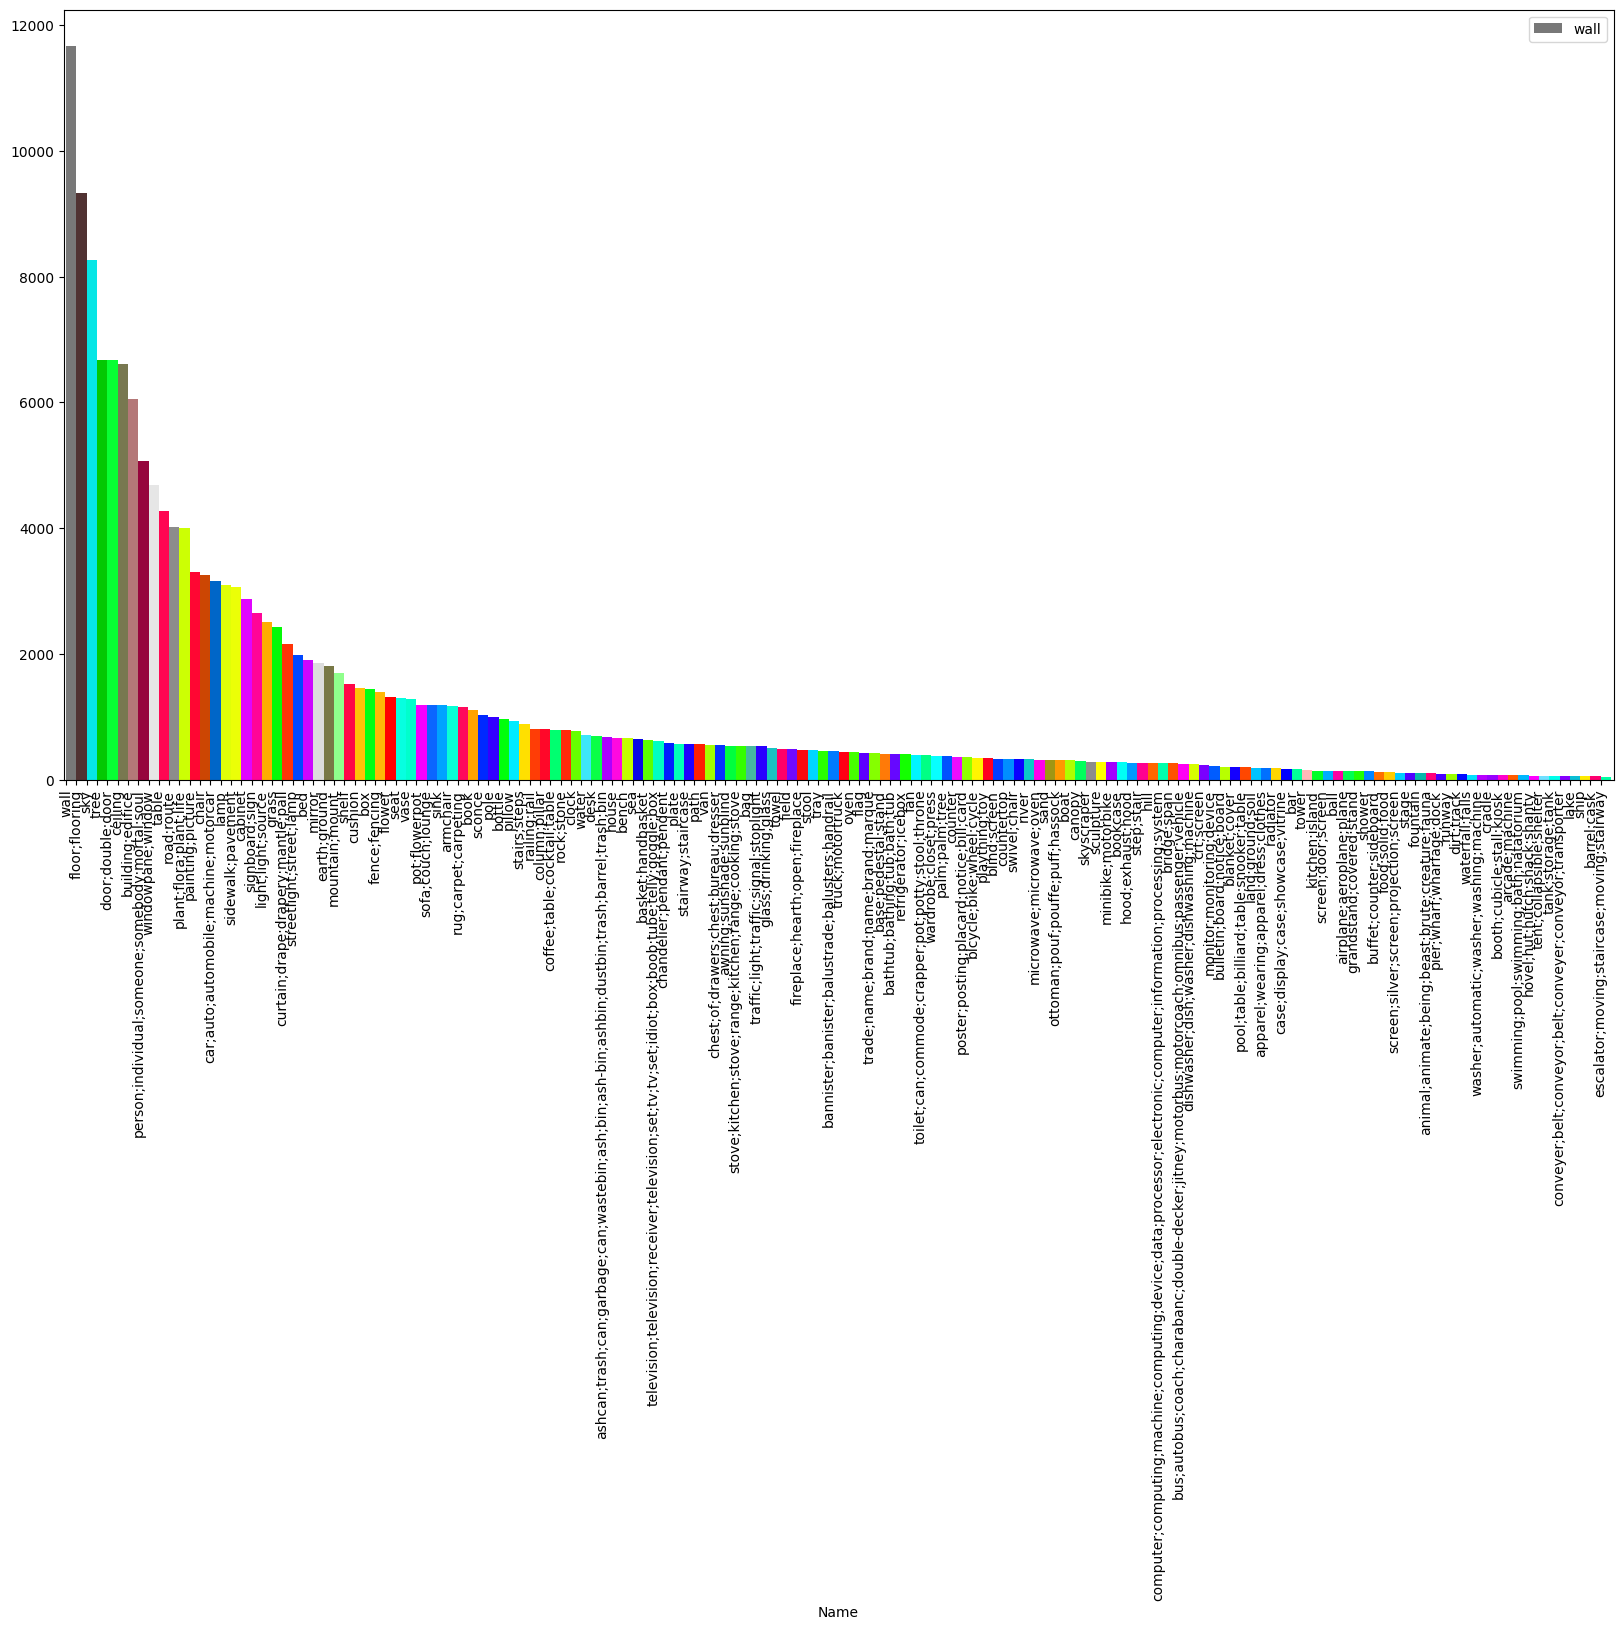

In [57]:
final_df.plot.bar(x="Name",y="Train",color=colors,figsize = (20, 10),width=1, align='edge')
plt.show()

In [60]:
final_df.describe()

Idx       Ratio         Train          Val       Stuff  Color
count  150.000000  150.000000    150.000000   150.000000  150.000000    0.0
mean    75.500000    0.006183   1139.493333   117.673333    0.233333    NaN
std     43.445368    0.018636   1842.597717   185.878379    0.424370    NaN
min      1.000000    0.000200     42.000000     3.000000    0.000000    NaN
25%     38.250000    0.000500    208.750000    22.250000    0.000000    NaN
50%     75.500000    0.001050    446.000000    49.000000    0.000000    NaN
75%    112.750000    0.002400   1168.500000   113.750000    0.000000    NaN
max    150.000000    0.157600  11664.000000  1172.000000    1.000000    NaN

## Validation Data

In [ ]:
final_df_Val = eda_df_data.sort_values(by=['Val'], ascending=False)
final_df_Val.describe()

In [64]:
final_df_Val

Idx   Ratio  Train   Val  Stuff Color_Code (R,G,B) Color_Code(hex)  \
0      1  0.1576  11664  1172      1    (120, 120, 120)         #787878   
3      4  0.0621   9336   917      1       (80, 50, 50)         #503232   
2      3  0.0878   8265   796      1      (6, 230, 230)         #06E6E6   
14    15  0.0118   6666   796      0       (8, 255, 51)         #08FF33   
5      6  0.0450   6604   643      1     (120, 120, 80)         #787850   
..   ...     ...    ...   ...    ...                ...             ...   
105  106  0.0005     57     4      1      (133, 0, 255)         #8500FF   
111  112  0.0005     50     4      0      (255, 0, 112)         #FF0070   
103  104  0.0006     52     4      0      (255, 235, 0)         #FFEB00   
114  115  0.0005     59     3      0    (112, 224, 255)         #70E0FF   
109  110  0.0005     66     3      1      (0, 184, 255)         #00B8FF   

     Color                                               Name  
0      NaN                                               wall  
3      NaN                                     floor;flooring  
2      NaN                                                sky  
14     NaN                                   door;double;door  
5      NaN                                            ceiling  
..     ...                                                ...  
105    NaN  conveyer;belt;conveyor;belt;conveyer;conveyor;...  
111    NaN                                        barrel;cask  
103    NaN                                               ship  
114    NaN                           tent;collapsible;shelter  
109    NaN             swimming;pool;swimming;bath;natatorium  

[150 rows x 9 columns]

In [65]:
colors = final_df_Val["Color_Code(hex)"]
colors

0      #787878
3      #503232
2      #06E6E6
14     #08FF33
5      #787850
        ...   
105    #8500FF
111    #FF0070
103    #FFEB00
114    #70E0FF
109    #00B8FF
Name: Color_Code(hex), Length: 150, dtype: object

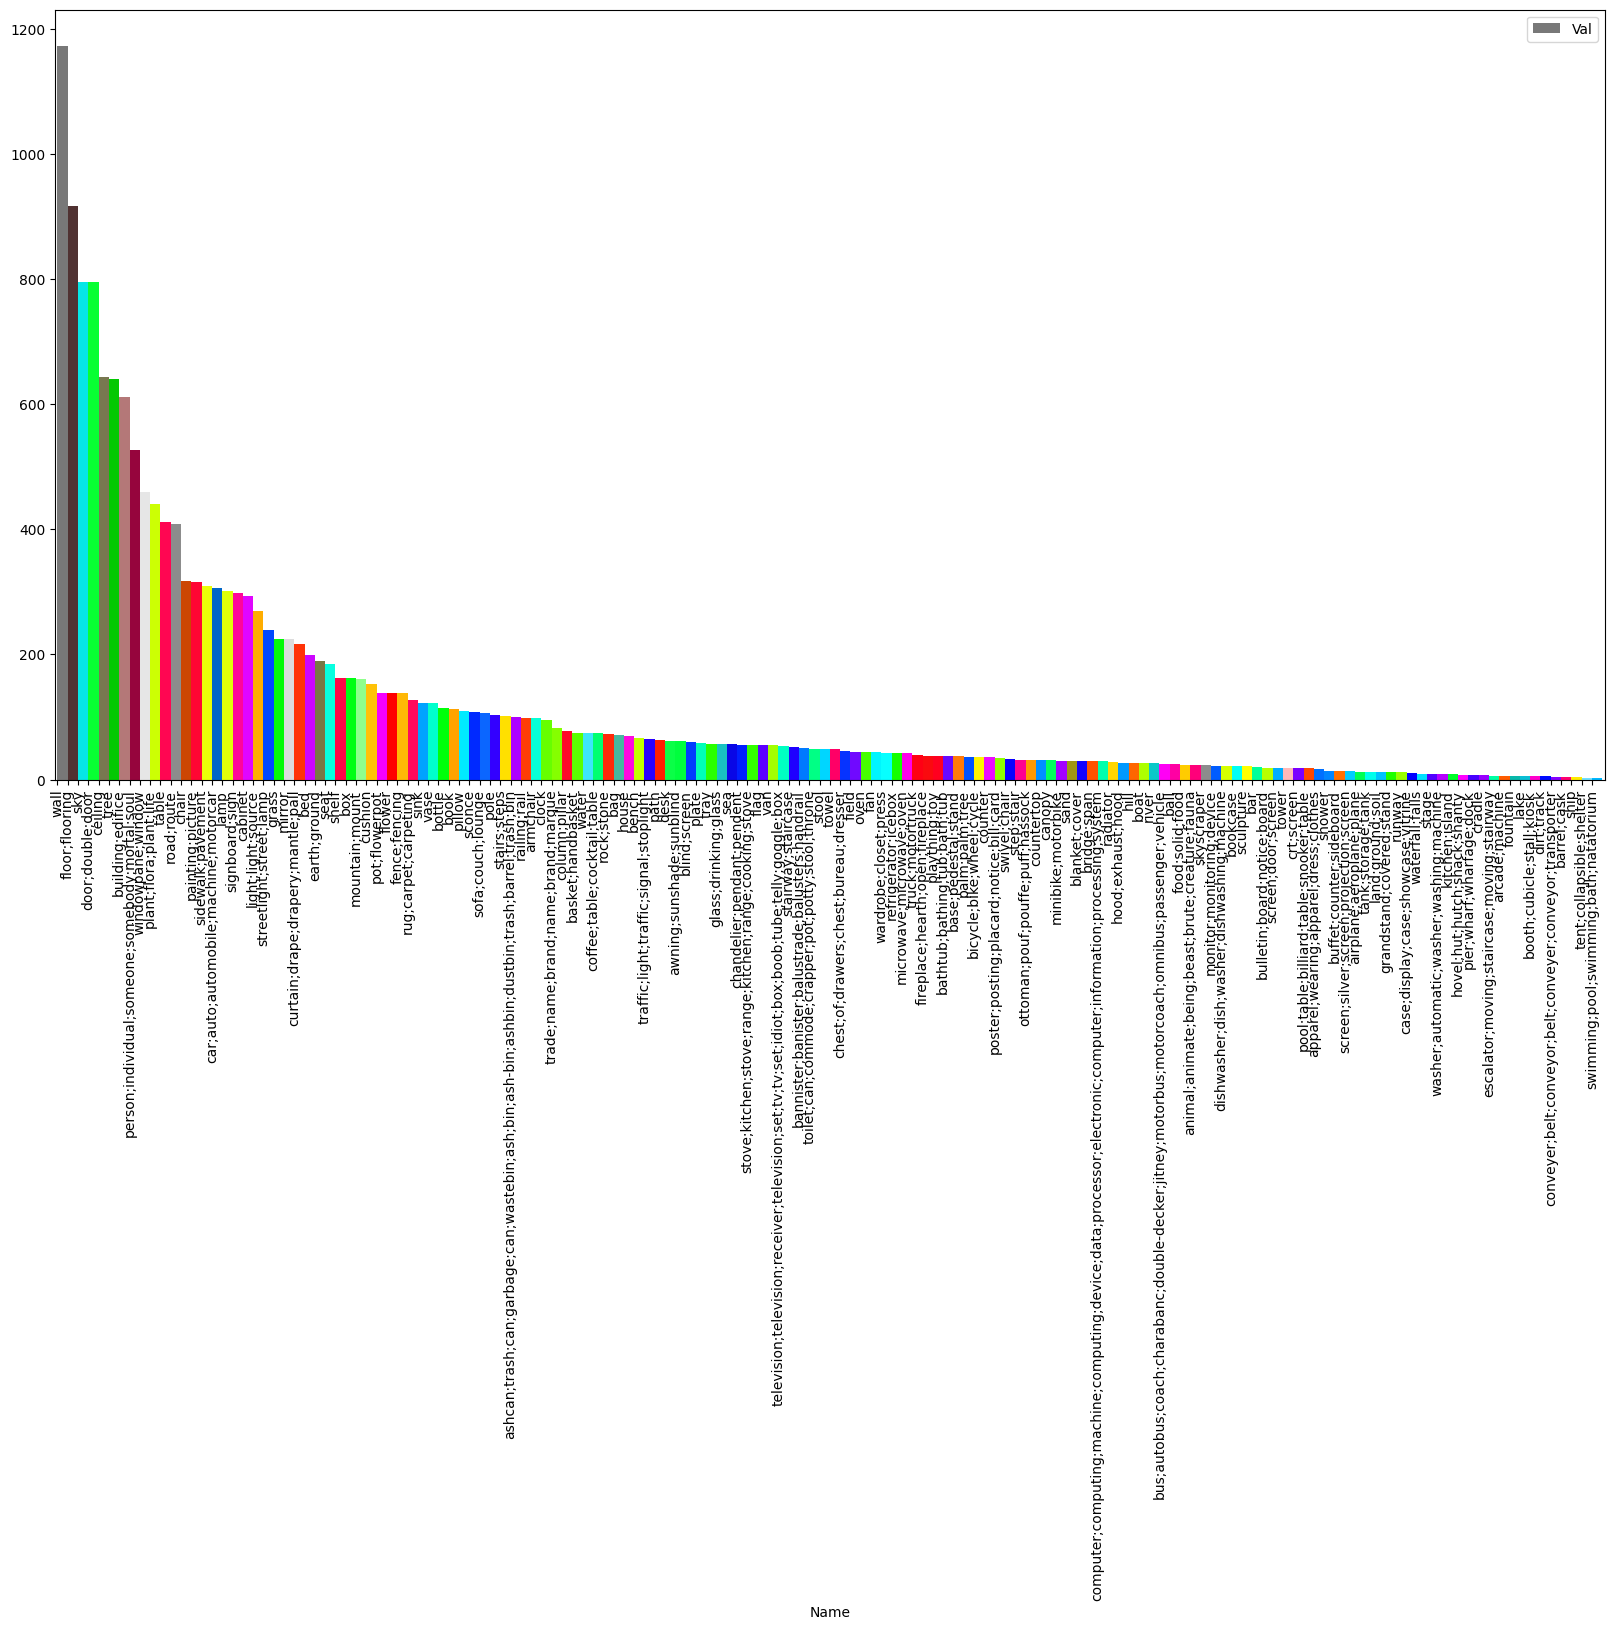

In [67]:
final_df_Val.plot.bar(x="Name",y="Val",color=colors,figsize = (20, 10),width=1, align='edge')
plt.show()

## Dataset Details

In [91]:
import os

General_path = r"D:\Dataset\snehalb06_739a88df\ADE20K_2021_17_01\images\ADE\training"
General_categories = os.listdir(General_path)

categories = {}

for i in General_categories:
    new_path = os.path.join(General_path,i)
    General_sub_categories = os.listdir(new_path)
    categories[i] = General_sub_categories
print(categories)


{'cultural': ['apse__indoor', 'aquarium', 'arcade', 'archive', 'armory', 'artists_loft', 'art_gallery', 'art_school', 'art_studio', 'auditorium', 'baptistry__indoor', 'belfry', 'bomb_shelter__indoor', 'burial_chamber', 'catacomb', 'cathedral__indoor', 'catwalk', 'chapel', 'choir_loft__exterior', 'choir_loft__interior', 'church__indoor', 'classroom', 'clock_tower__indoor', 'cloister__indoor', 'conference_center', 'confessional', 'courtroom', 'day_care_center', 'funeral_chapel', 'funeral_home', 'gun_deck__indoor', 'jail_cell', 'jail__indoor', 'jury_box', 'kindergarden_classroom', 'lab_classroom', 'lecture_room', 'legislative_chamber', 'library__indoor', 'monastery__indoor', 'morgue', 'mosque__indoor', 'movie_theater__indoor', 'museum__indoor', 'music_studio', 'natural_history_museum', 'organ_loft__exterior', 'organ_loft__interior', 'ossuary', 'planetarium__indoor', 'podium__indoor', 'pulpit', 'sacristy', 'science_museum', 'scriptorium', 'shrine', 'stage__indoor', 'synagogue__indoor', 'te

In [170]:
for k,v in categories.items():
    print(k,"\n ===================================================================\n",v)

cultural 
 ['apse__indoor', 'aquarium', 'arcade', 'archive', 'armory', 'artists_loft', 'art_gallery', 'art_school', 'art_studio', 'auditorium', 'baptistry__indoor', 'belfry', 'bomb_shelter__indoor', 'burial_chamber', 'catacomb', 'cathedral__indoor', 'catwalk', 'chapel', 'choir_loft__exterior', 'choir_loft__interior', 'church__indoor', 'classroom', 'clock_tower__indoor', 'cloister__indoor', 'conference_center', 'confessional', 'courtroom', 'day_care_center', 'funeral_chapel', 'funeral_home', 'gun_deck__indoor', 'jail_cell', 'jail__indoor', 'jury_box', 'kindergarden_classroom', 'lab_classroom', 'lecture_room', 'legislative_chamber', 'library__indoor', 'monastery__indoor', 'morgue', 'mosque__indoor', 'movie_theater__indoor', 'museum__indoor', 'music_studio', 'natural_history_museum', 'organ_loft__exterior', 'organ_loft__interior', 'ossuary', 'planetarium__indoor', 'podium__indoor', 'pulpit', 'sacristy', 'science_museum', 'scriptorium', 'shrine', 'stage__indoor', 'synagogue__indoor', 'tele

In [92]:
pwd

'D:\\Grad Project\\Code\\Scene-Parsing'

In [93]:
len(list(categories.values()))

10

In [94]:
data_images = pd.DataFrame(categories.items(),columns=["Category","SubCategory"])

In [95]:
data_images


Category                                        SubCategory
0             cultural  [apse__indoor, aquarium, arcade, archive, armo...
1        home_or_hotel  [alcove, atrium__home, attic, barrack, basemen...
2           industrial  [brickyard__outdoor, chemical_plant, construct...
3     nature_landscape  [badlands, bamboo_forest, bayou, beach, boardw...
4  shopping_and_dining  [auto_showroom, bakery__kitchen, bakery__shop,...
5   sports_and_leisure  [amusement_arcade, amusement_park, aquatic_the...
6       transportation  [airlock, airplane_cabin, airport_terminal, ai...
7         unclassified  [athletic_field_outdoor, balcony_exterior, bal...
8                urban  [abbey, access_road, airfield, airport__airpor...
9           work_place  [anechoic_chamber, assembly_line, atrium__publ...

In [17]:

for root, dirs, files in os.walk(General_path, topdown=True):
    print(len(dirs))
    if len(dirs)!=0:
        for cat in range(len(dirs)):
            General_categories.append(dirs[cat])
        print(General_categories) 
        
    """for name in files:
        print(os.path.join(root, name))
        
    for name in dirs:
        print(os.path.join(root, name))"""
        
list(os.walk(General_path, topdown=True))

[('D:\\Dataset\\snehalb06_739a88df\\ADE20K_2021_17_01\\images\\ADE\\training',
  ['cultural',
   'home_or_hotel',
   'industrial',
   'nature_landscape',
   'shopping_and_dining',
   'sports_and_leisure',
   'transportation',
   'unclassified',
   'urban',
   'work_place'],
  []),
 ('D:\\Dataset\\snehalb06_739a88df\\ADE20K_2021_17_01\\images\\ADE\\training\\cultural',
  ['apse__indoor',
   'aquarium',
   'arcade',
   'archive',
   'armory',
   'artists_loft',
   'art_gallery',
   'art_school',
   'art_studio',
   'auditorium',
   'baptistry__indoor',
   'belfry',
   'bomb_shelter__indoor',
   'burial_chamber',
   'catacomb',
   'cathedral__indoor',
   'catwalk',
   'chapel',
   'choir_loft__exterior',
   'choir_loft__interior',
   'church__indoor',
   'classroom',
   'clock_tower__indoor',
   'cloister__indoor',
   'conference_center',
   'confessional',
   'courtroom',
   'day_care_center',
   'funeral_chapel',
   'funeral_home',
   'gun_deck__indoor',
   'jail_cell',
   'jail__indoor

## General Categories : 
['cultural',
   'home_or_hotel',
   'industrial',
   'nature_landscape',
   'shopping_and_dining',
   'sports_and_leisure',
   'transportation',
   'unclassified',
   'urban',
   'wor

## Cultural:
['apse__indoor',
   'aquarium',
   'arcade',
   'archive',
   'armory',
   'artists_loft',
   'art_gallery',
   'art_school',
   'art_studio',
   'auditorium',
   'baptistry__indoor',
   'belfry',
   'bomb_shelter__indoor',
   'burial_chamber',
   'catacomb',
   'cathedral__indoor',
   'catwalk',
   'chapel',
   'choir_loft__exterior',
   'choir_loft__interior',
   'church__indoor',
   'classroom',
   'clock_tower__indoor',
   'cloister__indoor',
   'conference_center',
   'confessional',
   'courtroom',
   'day_care_center',
   'funeral_chapel',
   'funeral_home',
   'gun_deck__indoor',
   'jail_cell',
   'jail__indoor',
   'jury_box',
   'kindergarden_classroom',
   'lab_classroom',
   'lecture_room',
   'legislative_chamber',
   'library__indoor',
   'monastery__indoor',
   'morgue',
   'mosque__indoor',
   'movie_theater__indoor',
   'museum__indoor',
   'music_studio',
   'natural_history_museum',
   'organ_loft__exterior',
   'organ_loft__interior',
   'ossuary',
   'planetarium__indoor',
   'podium__indoor',
   'pulpit',
   'sacristy',
   'science_museum',
   'scriptorium',
   'shrine',
   'stage__indoor',
   'synagogue__indoor',
   'television_studio',
   'theater__indoor_procenium',
   'theater__indoor_seats',
   'throne_room',
   'ticket_booth',
   'vestry',]


   'voting_booth',
   'whispering_gallery',
   'witness_stand'k_place']

In [96]:
os.listdir(General_path)

['cultural',
 'home_or_hotel',
 'industrial',
 'nature_landscape',
 'shopping_and_dining',
 'sports_and_leisure',
 'transportation',
 'unclassified',
 'urban',
 'work_place']

In [97]:
subCat =  os.listdir(General_path)

In [98]:
list(os.scandir(General_path))

[<DirEntry 'cultural'>,
 <DirEntry 'home_or_hotel'>,
 <DirEntry 'industrial'>,
 <DirEntry 'nature_landscape'>,
 <DirEntry 'shopping_and_dining'>,
 <DirEntry 'sports_and_leisure'>,
 <DirEntry 'transportation'>,
 <DirEntry 'unclassified'>,
 <DirEntry 'urban'>,
 <DirEntry 'work_place'>]

# Making dataframe with folder, path, category, subcategory and segmentation mask detail

In [99]:
import glob
subFolders = {}
segmentation = {}
for i in subCat: 
    k = os.listdir(General_path+'/'+str(i))
    for j in k:
        images = []
        segment = []
        inside_folder = os.listdir(General_path+'/'+str(i)+'/'+str(j)+'/')
        for m in inside_folder:
            if m.endswith("_seg.png"):
                segment.append(m)
            if m.endswith(".jpg"):
                images.append(m)
        subFolders[General_path+'/'+str(i)+'/'+str(j)+'/'] = images
        segmentation[General_path+'/'+str(i)+'/'+str(j)+'/'] = segment

In [100]:
#Printing Subfolders
sub = list(subFolders.keys())
print(*sub,sep="\n",end="\n")

D:\Dataset\snehalb06_739a88df\ADE20K_2021_17_01\images\ADE\training/cultural/apse__indoor/
D:\Dataset\snehalb06_739a88df\ADE20K_2021_17_01\images\ADE\training/cultural/aquarium/
D:\Dataset\snehalb06_739a88df\ADE20K_2021_17_01\images\ADE\training/cultural/arcade/
D:\Dataset\snehalb06_739a88df\ADE20K_2021_17_01\images\ADE\training/cultural/archive/
D:\Dataset\snehalb06_739a88df\ADE20K_2021_17_01\images\ADE\training/cultural/armory/
D:\Dataset\snehalb06_739a88df\ADE20K_2021_17_01\images\ADE\training/cultural/artists_loft/
D:\Dataset\snehalb06_739a88df\ADE20K_2021_17_01\images\ADE\training/cultural/art_gallery/
D:\Dataset\snehalb06_739a88df\ADE20K_2021_17_01\images\ADE\training/cultural/art_school/
D:\Dataset\snehalb06_739a88df\ADE20K_2021_17_01\images\ADE\training/cultural/art_studio/
D:\Dataset\snehalb06_739a88df\ADE20K_2021_17_01\images\ADE\training/cultural/auditorium/
D:\Dataset\snehalb06_739a88df\ADE20K_2021_17_01\images\ADE\training/cultural/baptistry__indoor/
D:\Dataset\snehalb06_7

In [101]:
#Printing Image Names
sub = list(subFolders.values())
print(*sub,sep="\n",end="\n")

['ADE_train_00001472.jpg', 'ADE_train_00001473.jpg', 'ADE_train_00001474.jpg', 'ADE_train_00001475.jpg', 'ADE_train_00001476.jpg', 'ADE_train_00001477.jpg', 'ADE_train_00001478.jpg', 'ADE_train_00001479.jpg', 'ADE_train_00001480.jpg', 'ADE_train_00001481.jpg']
['ADE_frame_00000007.jpg', 'ADE_train_00001488.jpg', 'ADE_train_00001489.jpg', 'ADE_train_00001490.jpg', 'ADE_train_00001491.jpg', 'ADE_train_00001492.jpg', 'ADE_train_00001493.jpg', 'ADE_train_00001494.jpg', 'ADE_train_00001495.jpg', 'ADE_train_00020233.jpg', 'ADE_train_00022632.jpg', 'ADE_train_00022633.jpg', 'ADE_train_00022634.jpg', 'ADE_train_00022635.jpg', 'ADE_train_00022636.jpg']
['ADE_train_00001522.jpg', 'ADE_train_00001523.jpg', 'ADE_train_00001524.jpg', 'ADE_train_00001525.jpg', 'ADE_train_00001526.jpg', 'ADE_train_00022645.jpg', 'ADE_train_00022646.jpg', 'ADE_train_00022647.jpg', 'ADE_train_00022648.jpg', 'ADE_train_00022649.jpg']
['ADE_train_00001549.jpg', 'ADE_train_00001550.jpg', 'ADE_train_00001551.jpg', 'ADE_tra

In [102]:
#Printing Segmmentation Mask 
seg = list(segmentation.keys())
print(*seg,sep="\n",end="\n")

D:\Dataset\snehalb06_739a88df\ADE20K_2021_17_01\images\ADE\training/cultural/apse__indoor/
D:\Dataset\snehalb06_739a88df\ADE20K_2021_17_01\images\ADE\training/cultural/aquarium/
D:\Dataset\snehalb06_739a88df\ADE20K_2021_17_01\images\ADE\training/cultural/arcade/
D:\Dataset\snehalb06_739a88df\ADE20K_2021_17_01\images\ADE\training/cultural/archive/
D:\Dataset\snehalb06_739a88df\ADE20K_2021_17_01\images\ADE\training/cultural/armory/
D:\Dataset\snehalb06_739a88df\ADE20K_2021_17_01\images\ADE\training/cultural/artists_loft/
D:\Dataset\snehalb06_739a88df\ADE20K_2021_17_01\images\ADE\training/cultural/art_gallery/
D:\Dataset\snehalb06_739a88df\ADE20K_2021_17_01\images\ADE\training/cultural/art_school/
D:\Dataset\snehalb06_739a88df\ADE20K_2021_17_01\images\ADE\training/cultural/art_studio/
D:\Dataset\snehalb06_739a88df\ADE20K_2021_17_01\images\ADE\training/cultural/auditorium/
D:\Dataset\snehalb06_739a88df\ADE20K_2021_17_01\images\ADE\training/cultural/baptistry__indoor/
D:\Dataset\snehalb06_7

In [103]:
seg = list(segmentation.values())
print(*seg,sep="\n",end="\n")

['ADE_train_00001472_seg.png', 'ADE_train_00001473_seg.png', 'ADE_train_00001474_seg.png', 'ADE_train_00001475_seg.png', 'ADE_train_00001476_seg.png', 'ADE_train_00001477_seg.png', 'ADE_train_00001478_seg.png', 'ADE_train_00001479_seg.png', 'ADE_train_00001480_seg.png', 'ADE_train_00001481_seg.png']
['ADE_frame_00000007_seg.png', 'ADE_train_00001488_seg.png', 'ADE_train_00001489_seg.png', 'ADE_train_00001490_seg.png', 'ADE_train_00001491_seg.png', 'ADE_train_00001492_seg.png', 'ADE_train_00001493_seg.png', 'ADE_train_00001494_seg.png', 'ADE_train_00001495_seg.png', 'ADE_train_00020233_seg.png', 'ADE_train_00022632_seg.png', 'ADE_train_00022633_seg.png', 'ADE_train_00022634_seg.png', 'ADE_train_00022635_seg.png', 'ADE_train_00022636_seg.png']
['ADE_train_00001522_seg.png', 'ADE_train_00001523_seg.png', 'ADE_train_00001524_seg.png', 'ADE_train_00001525_seg.png', 'ADE_train_00001526_seg.png', 'ADE_train_00022645_seg.png', 'ADE_train_00022646_seg.png', 'ADE_train_00022647_seg.png', 'ADE_tr

In [104]:
#creating a new dataframe 
df = pd.DataFrame(columns = ['Index', 'SubFolder','Image','category','subCategory'])
print(df)

Empty DataFrame
Columns: [Index, SubFolder, Image, category, subCategory]
Index: []


In [87]:
path = 'D:\Dataset\snehalb06_739a88df\ADE20K_2021_17_01\images\ADE\training/cultural/cathedral__indoor/'
print(path.split('/'))

['D:\\Dataset\\snehalb06_739a88df\\ADE20K_2021_17_01\\images\\ADE\training', 'cultural', 'cathedral__indoor', '']


In [107]:
#Function to get Category and subcategory from folder path
def getCatSub(path):
    return path.split('/')[1] , path.split('/')[2]
    

In [110]:
#Adding Data to dataframe
i=1
cat = []
old_path = list(subFolders.keys())[0]
cat,sub = cat, sub = getCatSub(old_path)
for k,v in subFolders.items():
    new_path = k
    for z in range(len(v)):
        if old_path != new_path:
            old_path = new_path
            cat, sub = getCatSub(new_path)
        df.loc[i] = [i,k, v[z],cat,sub]
        i+=1

In [111]:
df

Index                                          SubFolder  \
1          1  D:\Dataset\snehalb06_739a88df\ADE20K_2021_17_0...   
2          2  D:\Dataset\snehalb06_739a88df\ADE20K_2021_17_0...   
3          3  D:\Dataset\snehalb06_739a88df\ADE20K_2021_17_0...   
4          4  D:\Dataset\snehalb06_739a88df\ADE20K_2021_17_0...   
5          5  D:\Dataset\snehalb06_739a88df\ADE20K_2021_17_0...   
...      ...                                                ...   
25570  25570  D:\Dataset\snehalb06_739a88df\ADE20K_2021_17_0...   
25571  25571  D:\Dataset\snehalb06_739a88df\ADE20K_2021_17_0...   
25572  25572  D:\Dataset\snehalb06_739a88df\ADE20K_2021_17_0...   
25573  25573  D:\Dataset\snehalb06_739a88df\ADE20K_2021_17_0...   
25574  25574  D:\Dataset\snehalb06_739a88df\ADE20K_2021_17_0...   

                        Image    category   subCategory  
1      ADE_train_00001472.jpg    cultural  apse__indoor  
2      ADE_train_00001473.jpg    cultural  apse__indoor  
3      ADE_train_00001474.jpg    cultural  apse__indoor  
4      ADE_train_00001475.jpg    cultural  apse__indoor  
5      ADE_train_00001476.jpg    cultural  apse__indoor  
...                       ...         ...           ...  
25570  ADE_train_00020107.jpg  work_place      workshop  
25571  ADE_train_00020108.jpg  work_place      workshop  
25572  ADE_train_00020109.jpg  work_place      workshop  
25573  ADE_train_00020110.jpg  work_place      workshop  
25574  ADE_train_00020111.jpg  work_place      workshop  

[25574 rows x 5 columns]

In [112]:
#Dataframe for segmentation mask
df_seg = pd.DataFrame(columns = ['SubFolder','seg',])
print(df_seg)

Empty DataFrame
Columns: [SubFolder, seg]
Index: []


In [113]:
#Adding data to segmentation dataframe
i=1
for k,v in segmentation.items():
    for z in range(len(v)):
        df_seg.loc[i] = [k, v[z]]
        i+=1
print(df_seg)

                                               SubFolder  \
1      D:\Dataset\snehalb06_739a88df\ADE20K_2021_17_0...   
2      D:\Dataset\snehalb06_739a88df\ADE20K_2021_17_0...   
3      D:\Dataset\snehalb06_739a88df\ADE20K_2021_17_0...   
4      D:\Dataset\snehalb06_739a88df\ADE20K_2021_17_0...   
5      D:\Dataset\snehalb06_739a88df\ADE20K_2021_17_0...   
...                                                  ...   
25570  D:\Dataset\snehalb06_739a88df\ADE20K_2021_17_0...   
25571  D:\Dataset\snehalb06_739a88df\ADE20K_2021_17_0...   
25572  D:\Dataset\snehalb06_739a88df\ADE20K_2021_17_0...   
25573  D:\Dataset\snehalb06_739a88df\ADE20K_2021_17_0...   
25574  D:\Dataset\snehalb06_739a88df\ADE20K_2021_17_0...   

                              seg  
1      ADE_train_00001472_seg.png  
2      ADE_train_00001473_seg.png  
3      ADE_train_00001474_seg.png  
4      ADE_train_00001475_seg.png  
5      ADE_train_00001476_seg.png  
...                           ...  
25570  ADE_train_00020107_s

In [114]:
#Adding segmentaion mask image details to old dataframe
df = df.assign(seg=df_seg['seg'])

In [115]:
df

Index                                          SubFolder  \
1          1  D:\Dataset\snehalb06_739a88df\ADE20K_2021_17_0...   
2          2  D:\Dataset\snehalb06_739a88df\ADE20K_2021_17_0...   
3          3  D:\Dataset\snehalb06_739a88df\ADE20K_2021_17_0...   
4          4  D:\Dataset\snehalb06_739a88df\ADE20K_2021_17_0...   
5          5  D:\Dataset\snehalb06_739a88df\ADE20K_2021_17_0...   
...      ...                                                ...   
25570  25570  D:\Dataset\snehalb06_739a88df\ADE20K_2021_17_0...   
25571  25571  D:\Dataset\snehalb06_739a88df\ADE20K_2021_17_0...   
25572  25572  D:\Dataset\snehalb06_739a88df\ADE20K_2021_17_0...   
25573  25573  D:\Dataset\snehalb06_739a88df\ADE20K_2021_17_0...   
25574  25574  D:\Dataset\snehalb06_739a88df\ADE20K_2021_17_0...   

                        Image    category   subCategory  \
1      ADE_train_00001472.jpg    cultural  apse__indoor   
2      ADE_train_00001473.jpg    cultural  apse__indoor   
3      ADE_train_00001474.jpg    cultural  apse__indoor   
4      ADE_train_00001475.jpg    cultural  apse__indoor   
5      ADE_train_00001476.jpg    cultural  apse__indoor   
...                       ...         ...           ...   
25570  ADE_train_00020107.jpg  work_place      workshop   
25571  ADE_train_00020108.jpg  work_place      workshop   
25572  ADE_train_00020109.jpg  work_place      workshop   
25573  ADE_train_00020110.jpg  work_place      workshop   
25574  ADE_train_00020111.jpg  work_place      workshop   

                              seg  
1      ADE_train_00001472_seg.png  
2      ADE_train_00001473_seg.png  
3      ADE_train_00001474_seg.png  
4      ADE_train_00001475_seg.png  
5      ADE_train_00001476_seg.png  
...                           ...  
25570  ADE_train_00020107_seg.png  
25571  ADE_train_00020108_seg.png  
25572  ADE_train_00020109_seg.png  
25573  ADE_train_00020110_seg.png  
25574  ADE_train_00020111_seg.png  

[25574 rows x 6 columns]

In [182]:
#Class Distribution
gp = dict(df.groupby(['category'])['category'].count().sort_values())

In [183]:
grouped_Data = pd.DataFrame(columns = ['category','count',])

In [184]:
i=1
for k,v in gp.items():
        grouped_Data.loc[i] = [k, v]
        i+=1
print(grouped_Data)

               category  count
1            industrial    351
2        transportation    694
3   shopping_and_dining   1090
4              cultural   1116
5    sports_and_leisure   1529
6            work_place   1566
7          unclassified   2537
8      nature_landscape   3333
9         home_or_hotel   6118
10                urban   7240


In [216]:
import math
grouped_Data['10_count'] = round(grouped_Data['count']* 0.1).astype(int)


In [222]:
#Appending Cumulative sum
grouped_Data = grouped_Data.assign(sum=grouped_Data["count"].cumsum())


In [223]:
grouped_Data

category  count  10_count    sum
1            industrial    351        35    351
2        transportation    694        69   1045
3   shopping_and_dining   1090       109   2135
4              cultural   1116       112   3251
5    sports_and_leisure   1529       153   4780
6            work_place   1566       157   6346
7          unclassified   2537       254   8883
8      nature_landscape   3333       333  12216
9         home_or_hotel   6118       612  18334
10                urban   7240       724  25574

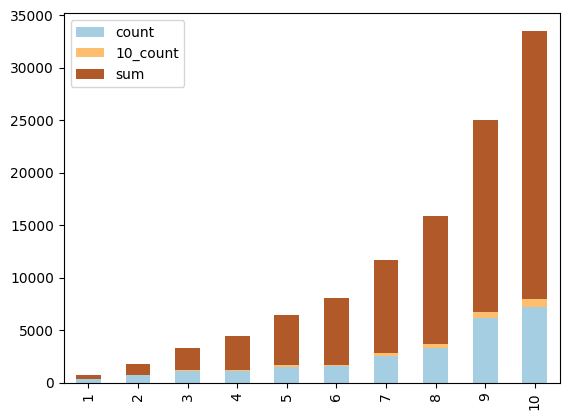

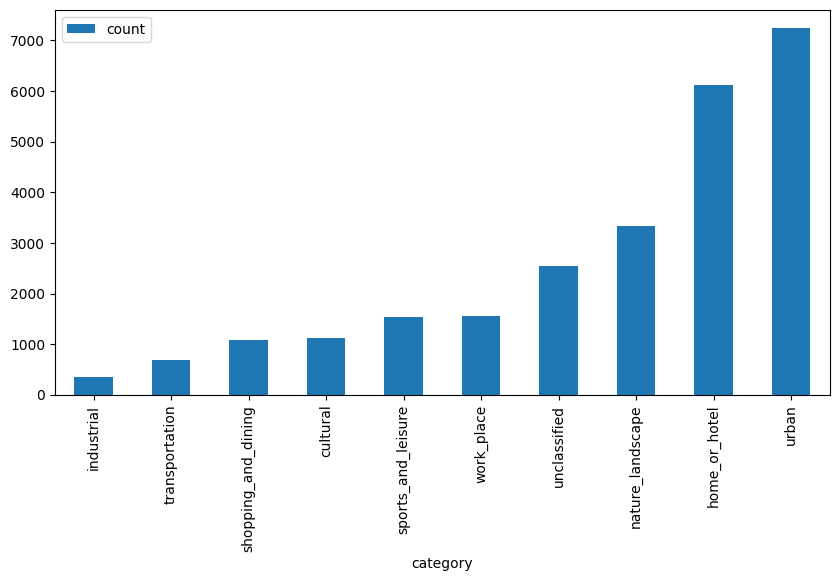

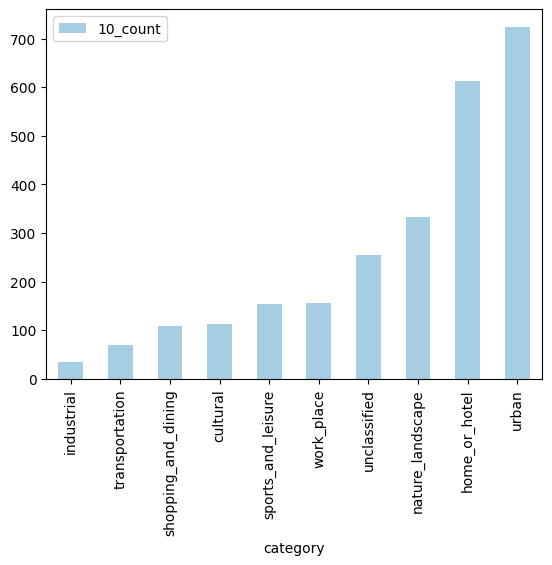

In [242]:
#Mapping Data and countplot
grouped_Data.plot.bar(colormap='Paired',stacked=True)
grouped_Data.plot.bar(x='category',y='count',figsize = (10, 5),width=0.5, align='center')
grouped_Data.plot.bar(x='category',y='10_count', align='center',stacked=True,colormap='Paired')
plt.show()

<Axes: xlabel='category', ylabel='count'>

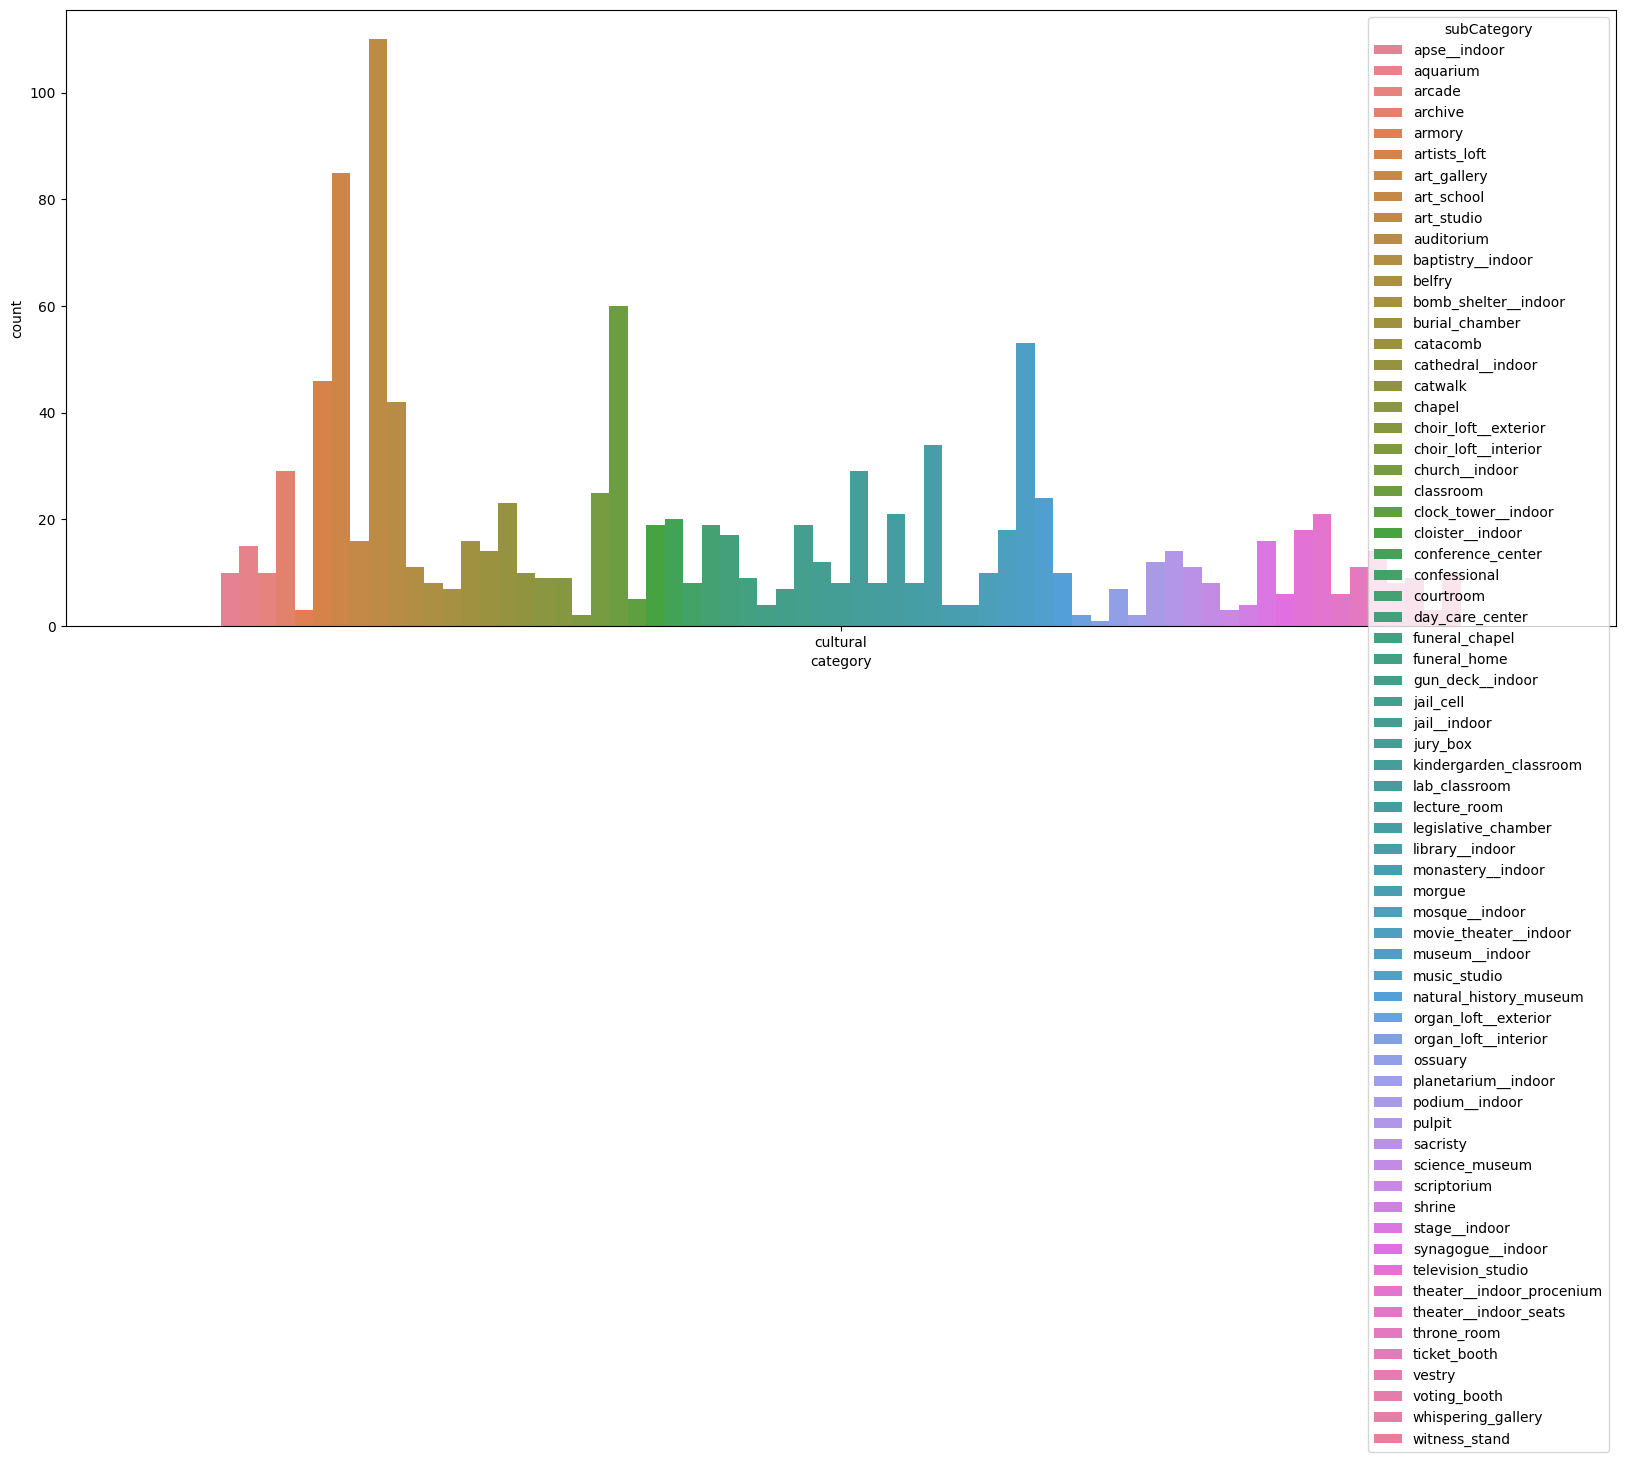

In [241]:
import seaborn as sns
plt.figure(figsize=(20,8))
sns.countplot(x='category',hue='subCategory',data=df[df['category']=='cultural'])

## Selecting Categories 

In [243]:
selected_category = ["work_place","transportation","nature_landscape","industrial","sports_and_leisure"]

In [244]:
selected_iamges  = df.loc[df['category'].isin(selected_category)]

Index                                          SubFolder  \
7586   7586  D:\Dataset\snehalb06_739a88df\ADE20K_2021_17_0...   
7587   7587  D:\Dataset\snehalb06_739a88df\ADE20K_2021_17_0...   
7588   7588  D:\Dataset\snehalb06_739a88df\ADE20K_2021_17_0...   
7589   7589  D:\Dataset\snehalb06_739a88df\ADE20K_2021_17_0...   
7590   7590  D:\Dataset\snehalb06_739a88df\ADE20K_2021_17_0...   

                       Image          category subCategory  \
7586  ADE_frame_00000019.jpg  nature_landscape    badlands   
7587  ADE_train_00000004.jpg  nature_landscape    badlands   
7588  ADE_train_00002076.jpg  nature_landscape    badlands   
7589  ADE_train_00002077.jpg  nature_landscape    badlands   
7590  ADE_train_00002078.jpg  nature_landscape    badlands   

                             seg  
7586  ADE_frame_00000019_seg.png  
7587  ADE_train_00000004_seg.png  
7588  ADE_train_00002076_seg.png  
7589  ADE_train_00002077_seg.png  
7590  ADE_train_00002078_seg.png

In [245]:
selected_iamges.groupby(['category'])['category'].count()

category
industrial             351
nature_landscape      3333
sports_and_leisure    1529
transportation         694
work_place            1566
Name: category, dtype: int64

In [230]:
images  = list(grouped_Data["sum"])

In [231]:
for i in range(len(images)):
    print(images[i])

351
1045
2135
3251
4780
6346
8883
12216
18334
25574


In [232]:
df

Index                                          SubFolder  \
1          1  D:\Dataset\snehalb06_739a88df\ADE20K_2021_17_0...   
2          2  D:\Dataset\snehalb06_739a88df\ADE20K_2021_17_0...   
3          3  D:\Dataset\snehalb06_739a88df\ADE20K_2021_17_0...   
4          4  D:\Dataset\snehalb06_739a88df\ADE20K_2021_17_0...   
5          5  D:\Dataset\snehalb06_739a88df\ADE20K_2021_17_0...   
...      ...                                                ...   
25570  25570  D:\Dataset\snehalb06_739a88df\ADE20K_2021_17_0...   
25571  25571  D:\Dataset\snehalb06_739a88df\ADE20K_2021_17_0...   
25572  25572  D:\Dataset\snehalb06_739a88df\ADE20K_2021_17_0...   
25573  25573  D:\Dataset\snehalb06_739a88df\ADE20K_2021_17_0...   
25574  25574  D:\Dataset\snehalb06_739a88df\ADE20K_2021_17_0...   

                        Image    category   subCategory  \
1      ADE_train_00001472.jpg    cultural  apse__indoor   
2      ADE_train_00001473.jpg    cultural  apse__indoor   
3      ADE_train_00001474.jpg    cultural  apse__indoor   
4      ADE_train_00001475.jpg    cultural  apse__indoor   
5      ADE_train_00001476.jpg    cultural  apse__indoor   
...                       ...         ...           ...   
25570  ADE_train_00020107.jpg  work_place      workshop   
25571  ADE_train_00020108.jpg  work_place      workshop   
25572  ADE_train_00020109.jpg  work_place      workshop   
25573  ADE_train_00020110.jpg  work_place      workshop   
25574  ADE_train_00020111.jpg  work_place      workshop   

                              seg  
1      ADE_train_00001472_seg.png  
2      ADE_train_00001473_seg.png  
3      ADE_train_00001474_seg.png  
4      ADE_train_00001475_seg.png  
5      ADE_train_00001476_seg.png  
...                           ...  
25570  ADE_train_00020107_seg.png  
25571  ADE_train_00020108_seg.png  
25572  ADE_train_00020109_seg.png  
25573  ADE_train_00020110_seg.png  
25574  ADE_train_00020111_seg.png  

[25574 rows x 6 columns]

In [246]:
selected_iamges

Index                                          SubFolder  \
7235    7235  D:\Dataset\snehalb06_739a88df\ADE20K_2021_17_0...   
7236    7236  D:\Dataset\snehalb06_739a88df\ADE20K_2021_17_0...   
7237    7237  D:\Dataset\snehalb06_739a88df\ADE20K_2021_17_0...   
7238    7238  D:\Dataset\snehalb06_739a88df\ADE20K_2021_17_0...   
7239    7239  D:\Dataset\snehalb06_739a88df\ADE20K_2021_17_0...   
...      ...                                                ...   
25570  25570  D:\Dataset\snehalb06_739a88df\ADE20K_2021_17_0...   
25571  25571  D:\Dataset\snehalb06_739a88df\ADE20K_2021_17_0...   
25572  25572  D:\Dataset\snehalb06_739a88df\ADE20K_2021_17_0...   
25573  25573  D:\Dataset\snehalb06_739a88df\ADE20K_2021_17_0...   
25574  25574  D:\Dataset\snehalb06_739a88df\ADE20K_2021_17_0...   

                        Image    category         subCategory  \
7235   ADE_train_00004539.jpg  industrial  brickyard__outdoor   
7236   ADE_train_00005414.jpg  industrial      chemical_plant   
7237   ADE_train_00005415.jpg  industrial      chemical_plant   
7238   ADE_train_00005416.jpg  industrial      chemical_plant   
7239   ADE_train_00005417.jpg  industrial      chemical_plant   
...                       ...         ...                 ...   
25570  ADE_train_00020107.jpg  work_place            workshop   
25571  ADE_train_00020108.jpg  work_place            workshop   
25572  ADE_train_00020109.jpg  work_place            workshop   
25573  ADE_train_00020110.jpg  work_place            workshop   
25574  ADE_train_00020111.jpg  work_place            workshop   

                              seg  
7235   ADE_train_00004539_seg.png  
7236   ADE_train_00005414_seg.png  
7237   ADE_train_00005415_seg.png  
7238   ADE_train_00005416_seg.png  
7239   ADE_train_00005417_seg.png  
...                           ...  
25570  ADE_train_00020107_seg.png  
25571  ADE_train_00020108_seg.png  
25572  ADE_train_00020109_seg.png  
25573  ADE_train_00020110_seg.png  
25574  ADE_train_00020111_seg.png  

[7473 rows x 6 columns]

In [247]:
copy_path = "D:\Grad Project\Dataset"

In [261]:
import shutil
#rec = int(selected_iamges.shape[0])
for i in range(int(selected_iamges.shape[0])):
    img_path = rec = selected_iamges["SubFolder"].iloc[i] + selected_iamges["Image"].iloc[i]
    seg_img_path = rec = selected_iamges["SubFolder"].iloc[i] + selected_iamges["seg"].iloc[i]
    print(img_path,seg_img_path)
    shutil.copy(img_path, copy_path)
    shutil.copy(seg_img_path, copy_path)

D:\Dataset\snehalb06_739a88df\ADE20K_2021_17_01\images\ADE\training/industrial/brickyard__outdoor/ADE_train_00004539.jpg D:\Dataset\snehalb06_739a88df\ADE20K_2021_17_01\images\ADE\training/industrial/brickyard__outdoor/ADE_train_00004539_seg.png
D:\Dataset\snehalb06_739a88df\ADE20K_2021_17_01\images\ADE\training/industrial/chemical_plant/ADE_train_00005414.jpg D:\Dataset\snehalb06_739a88df\ADE20K_2021_17_01\images\ADE\training/industrial/chemical_plant/ADE_train_00005414_seg.png
D:\Dataset\snehalb06_739a88df\ADE20K_2021_17_01\images\ADE\training/industrial/chemical_plant/ADE_train_00005415.jpg D:\Dataset\snehalb06_739a88df\ADE20K_2021_17_01\images\ADE\training/industrial/chemical_plant/ADE_train_00005415_seg.png
D:\Dataset\snehalb06_739a88df\ADE20K_2021_17_01\images\ADE\training/industrial/chemical_plant/ADE_train_00005416.jpg D:\Dataset\snehalb06_739a88df\ADE20K_2021_17_01\images\ADE\training/industrial/chemical_plant/ADE_train_00005416_seg.png
D:\Dataset\snehalb06_739a88df\ADE20K_202